In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# EDA-Exploratory Data Analysis

In [3]:
# Checking the Feature Names 
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [4]:
# Checking the shape of the dataset
df.shape

(1030, 9)

In [5]:
# Checking for the null values
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
# There are not any null values in the dataset

<AxesSubplot:>

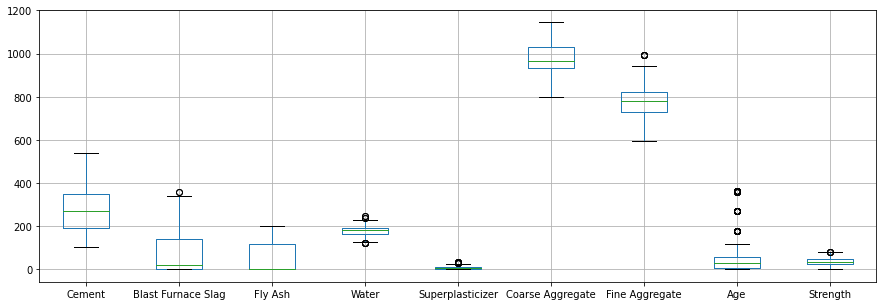

In [7]:
plt.figure(figsize=(15,5))
df.boxplot()

In [8]:
# Here We can observe that there are some outliers present in these dataset
# We need to treat that outliers it directly gets affected on the mean and standard deviation

In [9]:
# Here we can treat the outliers by using the for loop and IQR ( Inter quartile Range ) method..............

In [10]:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
#     mean=df[i].mean()
    df.loc[df[i]>upper_tail,i]=upper_tail

<AxesSubplot:>

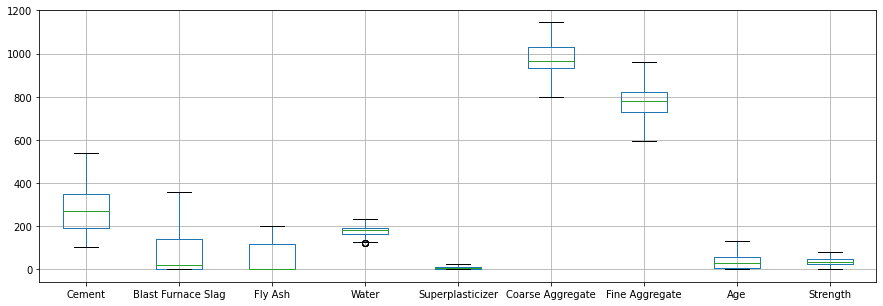

In [11]:
plt.figure(figsize=(15,5))
df.boxplot()

In [12]:
df.corr().round(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.00,-0.28,-0.40,-0.08,0.08,-0.11,-0.23,0.05,0.50
Blast Furnace Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.05,0.13
Fly Ash,-0.40,-0.32,1.00,-0.26,0.40,-0.01,0.08,-0.09,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.19,-0.29
Superplasticizer,0.08,0.04,0.40,-0.66,1.00,-0.26,0.22,-0.12,0.37
Coarse Aggregate,-0.11,-0.28,-0.01,-0.18,-0.26,1.00,-0.18,0.01,-0.17
Fine Aggregate,-0.23,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.10,-0.17
Age,0.05,-0.05,-0.09,0.19,-0.12,0.01,-0.10,1.00,0.47
Strength,0.50,0.13,-0.11,-0.29,0.37,-0.17,-0.17,0.47,1.00


<AxesSubplot:>

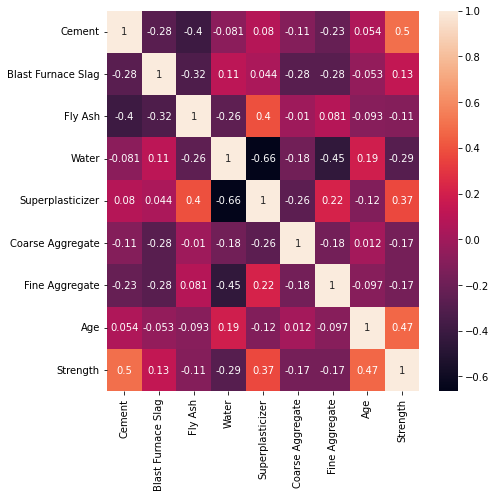

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [14]:
# sns.pairplot(df)

In [15]:
x=df.drop('Strength',axis=1)
y=df['Strength']

# Train Test Split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1111)

# Model Building

In [17]:
knn_model=KNeighborsRegressor()

In [18]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

#### Model Evaluation on testing data

In [19]:
y_pred=knn_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared value:-",r2)
adj_r2=1-(((1-r2)*(x_test.shape[0]-1)))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squared value:-",adj_r2)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error:-",mse)
rmse=np.sqrt(mse)
print("Root mean Square error:-",rmse)

R-Squared value:- 0.6915705792504037
Adjusted R-Squared value:- 0.6790455266311307
Mean Absolute error:- 6.485194174757281
Mean Squared error:- 77.33045243932038
Root mean Square error:- 8.79377350398112


#### Model evaluation on Training data

In [20]:
y_pred_train=knn_model.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squared value:-",r2)
adj_r2=1-(((1-r2)*(x_train.shape[0]-1)))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R-Squared value:-",adj_r2)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute error:-",mae)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared error:-",mse)
rmse=np.sqrt(mse)
print("Root mean Square error:-",rmse)

R-Squared value:- 0.8150938977276534
Adjusted R-Squared value:- 0.8132788685028942
Mean Absolute error:- 5.491429611650486
Mean Squared error:- 52.74061283616505
Root mean Square error:- 7.262273255404608


In [21]:
########## Choosing best Hyperparameters for KNN regression algorithm........

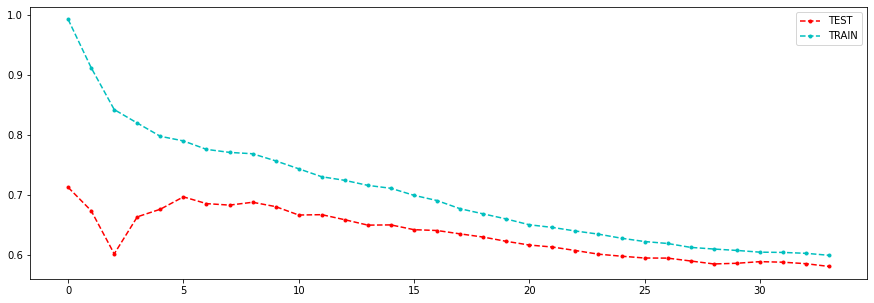

In [22]:
test=[]
train=[]
for i in range(1,35):
    knn=KNeighborsRegressor(n_neighbors=i,p=1)#Here we are using the p=1 means we are using the manhatten distance
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    r2_test=r2_score(y_test,y_pred_test)
    test.append(r2_test)
    y_pred_train=knn.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    train.append(r2_train)
plt.figure(figsize=(15,5))
plt.plot(test,'r.--',label="TEST")
plt.plot(train,'c.--',label="TRAIN")
plt.legend()

In [23]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5


In [24]:
y.head()

0    79.7725
1    61.8900
2    40.2700
3    41.0500
4    44.3000
Name: Strength, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11111)

In [26]:
std_scalar=StandardScaler()
std_scalar.fit(x_train)
array=std_scalar.transform(x_train)
x_train=pd.DataFrame(array,columns=x.columns)
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.073448,-0.343131,1.104546,-1.083196,0.800131,1.374002,0.263782,-0.974906
1,-1.087601,0.697819,1.171578,-0.267704,0.289238,0.415725,-0.358871,1.733221
2,0.635255,-0.844021,-0.833139,0.230125,-1.039085,0.977828,-0.065119,-0.863231
3,0.531468,-0.844021,-0.833139,0.751661,-1.039085,-0.076919,0.072969,-0.667799
4,0.861698,1.401677,-0.833139,-0.523731,0.680923,-0.615869,-0.232081,-0.276935


In [27]:
array=std_scalar.transform(x_test)
x_test_df=pd.DataFrame(array,columns=x_test.columns)
x_test_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-0.420537,-0.844021,0.633765,0.263314,0.152999,-0.309735,0.901499,-0.974906
1,2.050525,-0.844021,-0.833139,0.893898,-1.039085,1.942536,-2.036016,-1.030744
2,0.455987,-0.844021,-0.833139,0.514599,-1.039085,0.656259,0.575108,-0.974906
3,-0.440351,-0.844021,-0.833139,0.562011,-1.039085,-0.076919,1.378531,2.556827
4,0.691866,-0.844021,1.380468,0.562011,0.834191,-2.225002,0.035309,-0.276935


In [28]:
x_test=x_test_df

In [29]:
x_test.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-0.420537,-0.844021,0.633765,0.263314,0.152999,-0.309735,0.901499,-0.974906
1,2.050525,-0.844021,-0.833139,0.893898,-1.039085,1.942536,-2.036016,-1.030744
2,0.455987,-0.844021,-0.833139,0.514599,-1.039085,0.656259,0.575108,-0.974906
3,-0.440351,-0.844021,-0.833139,0.562011,-1.039085,-0.076919,1.378531,2.556827
4,0.691866,-0.844021,1.380468,0.562011,0.834191,-2.225002,0.035309,-0.276935


In [31]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [32]:
y_pred=knn.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared value:-",r2)
adj_r2=1-(((1-r2)*(x_test.shape[0]-1)))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squared value:-",adj_r2)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error:-",mse)
rmse=np.sqrt(mse)
print("Root mean Square error:-",rmse)

R-Squared value:- 0.6844720949662135
Adjusted R-Squared value:- 0.6716587790257552
Mean Absolute error:- 6.394393203883495
Mean Squared error:- 79.37397349999998
Root mean Square error:- 8.909207231847287


In [34]:
y_pred_train=knn.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squared value:-",r2)
adj_r2=1-(((1-r2)*(x_train.shape[0]-1)))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R-Squared value:-",adj_r2)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute error:-",mae)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared error:-",mse)
rmse=np.sqrt(mse)
print("Root mean Square error:-",rmse)

R-Squared value:- 0.8645206055515295
Adjusted R-Squared value:- 0.8631907464649188
Mean Absolute error:- 4.737539441747573
Mean Squared error:- 38.51961713501213
Root mean Square error:- 6.206417415467005


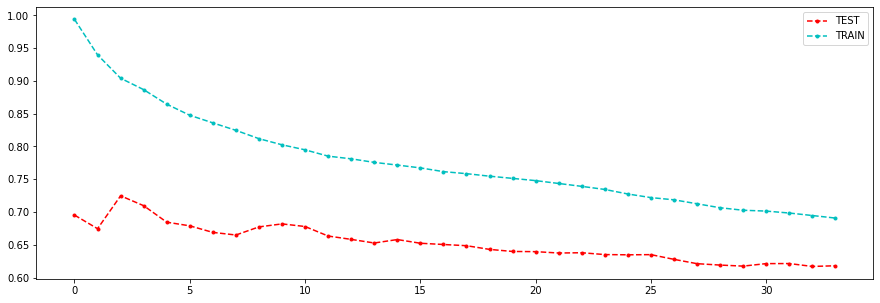

In [36]:
test=[]
train=[]
for i in range(1,35):
    knn=KNeighborsRegressor(n_neighbors=i,p=2)#Here we are using the p=1 means we are using the manhatten distance
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    r2_test=r2_score(y_test,y_pred_test)
    test.append(r2_test)
    y_pred_train=knn.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    train.append(r2_train)
plt.figure(figsize=(15,5))
plt.plot(test,'r.--',label="TEST")
plt.plot(train,'c.--',label="TRAIN")
plt.legend()

In [37]:
import pickle
with open('concrete_model.pkl','wb')as f:
    pickle.dump(knn,f)

In [38]:
with open('std_scalar.pkl','wb')as f:
    pickle.dump(std_scalar,f)

In [39]:
data={"columns":list(x.columns)}
import json
with open('concrete_data.json','w')as f:
    json.dump(data,f)

In [40]:
x.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')